In [1]:
import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
import copy

In [2]:
from gp_utilities import *
from gp_algorithms import EI, PI, TS, UCB, GP_UCB
import c

In [3]:
# Plots Settings
plt.rc('axes', edgecolor = c.nordblack)
plt.rc('xtick', color = c.nordblack)
plt.rc('ytick', color = c.nordblack)
plt.rcParams['text.color'] = c.nordblack

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (9, 6)

plt.rcParams['axes.prop_cycle'] = cycler('color', [c.nordblue, c.nordgreen, c.nordorange, c.nordmagenta ,c.nordyellow, c.nordcyan])

# Seed for randomness
np.random.seed(seed=111)

**Objective Function**

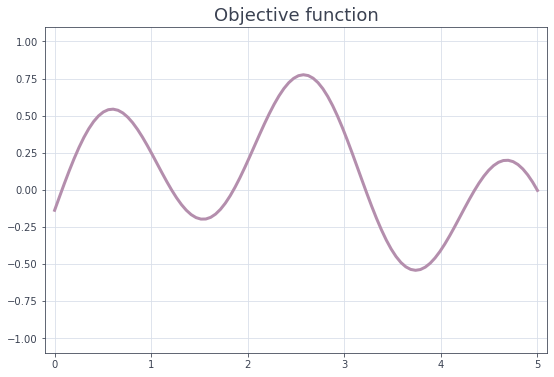

In [4]:
#f = lambda x: (-(1.4 - 3*x) * np.sin(18*x)).flatten()
#f = lambda x: (x * np.sin(x) + x * np.cos(2*x)).flatten()
f = lambda x: (0.5*np.sin(3*x) + np.cos(x-2)/3).flatten()

xmin, xmax = -0, 5
ymin, ymax = -1.1, 1.1

x_plot = np.linspace(xmin,xmax, 100).reshape(-1,1)
y_plot = f(x_plot)

plt.title('Objective function')
plt.axis([xmin-.1, xmax+0.1, ymin, ymax])
plt.grid(color = c.nordwhite)
plt.plot(x_plot,y_plot, c = c.nordmagenta, lw=3)
#plt.savefig('images/obj_func.png')
plt.show()

**Data**

In [5]:
N = 2          # training points
n = 100        # test points
noise = 0.02   # noise variance

In [6]:
X = np.random.uniform(xmin,xmax, size=(N,1))
y = f(X) + noise*np.random.randn(N)

Xtest = np.linspace(xmin, xmax, n).reshape(-1,1)

**Kernel**

In [7]:
def kernel(a, b, lengthscale = .1, variance = 1):
    """ GP squared exponential kernel """
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return variance * np.exp(-.5 * (1/lengthscale) * sqdist)

**Mean and Variance of GP**

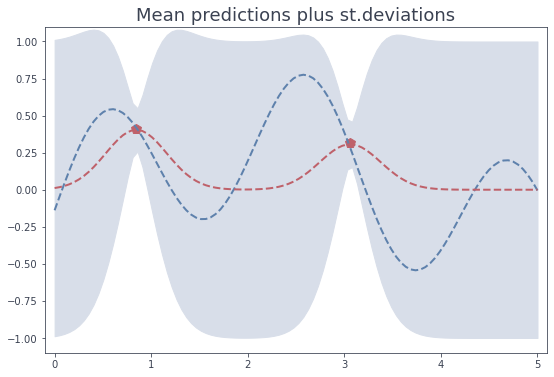

In [8]:
mu, s = compute_mean_and_variance(X,y,Xtest,kernel)
plot_GP(X,y,Xtest,mu,s,f,noise,xmin-0.1,xmax+0.1,ymin,ymax)

**Samples from GP posterior**

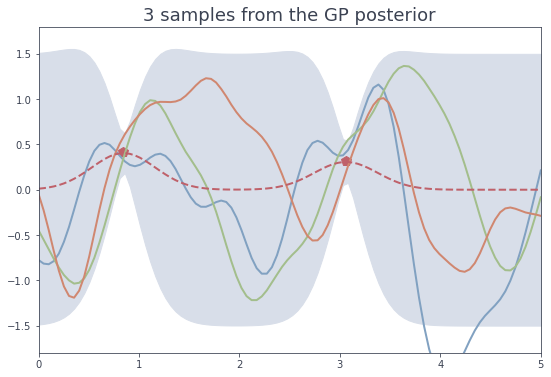

In [9]:
nsamples = 3
sample_and_plot_posteriors(nsamples,X,y,Xtest,kernel,noise,xmin,xmax,ymin-.7,ymax+.7,save=False)

**Acquisition Functions**

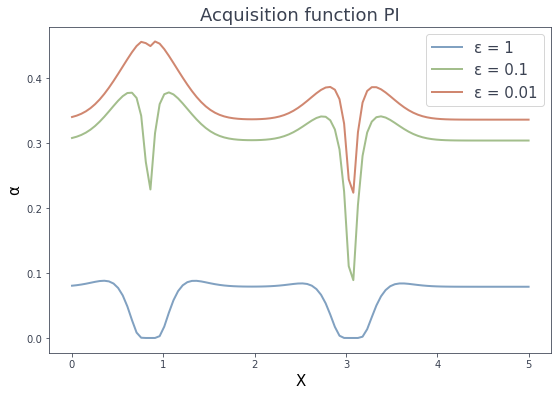

In [10]:
eps_list = [1,0.1,0.01]
compare_af_values(X,y,Xtest,PI,kernel,xmin,xmax,eps_list,method='PI')

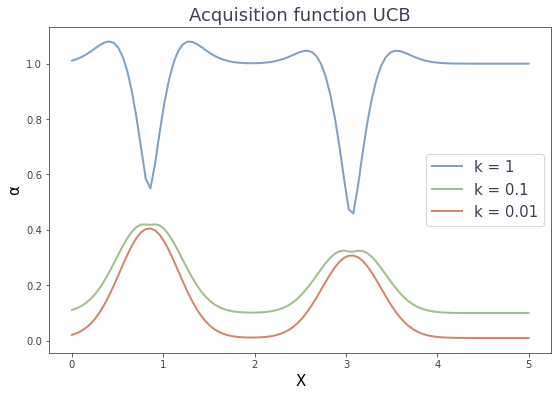

In [11]:
compare_af_values(X,y,Xtest,UCB,kernel,xmin,xmax,eps_list,method='UCB')

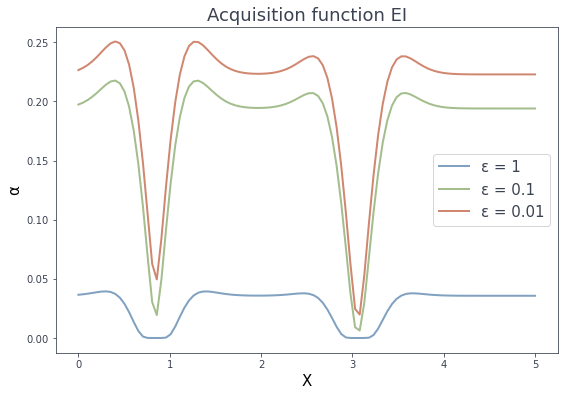

In [12]:
compare_af_values(X,y,Xtest,EI,kernel,xmin,xmax,eps_list,method='EI')

**Test Algorithms**

In [13]:
# Plots Settings
plt.rc('axes', edgecolor = c.nordblack)
plt.rc('xtick', color = c.nordblack)
plt.rc('ytick', color = c.nordblack)
plt.rcParams['text.color'] = c.nordblack

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (6, 8)

**UCB**

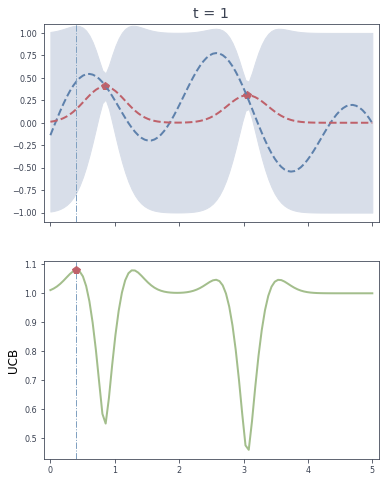

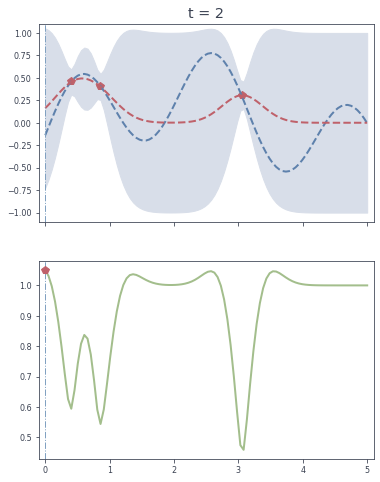

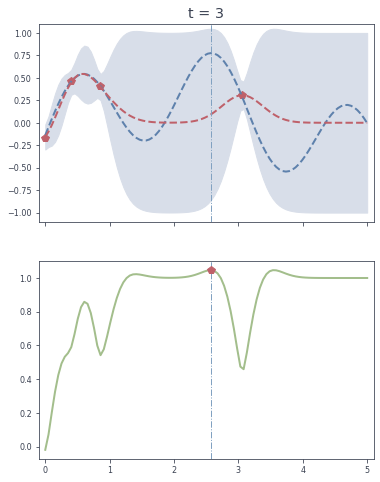

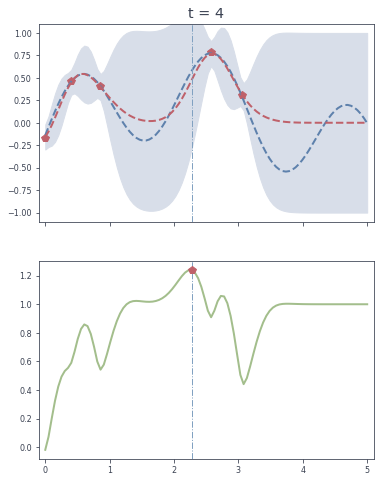

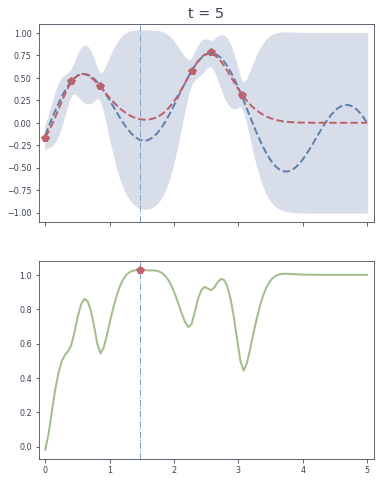

In [14]:
it = 5

X_ucb = copy.deepcopy(X)
y_ucb = copy.deepcopy(y)
Xtest_ucb = copy.deepcopy(Xtest)

for t in range(it):
    X_ucb,y_ucb = update_GP(X_ucb,y_ucb,Xtest_ucb,f,noise,UCB,kernel,xmin-0.1,xmax+0.1,ymin,ymax,it=t+1,eps=0.1,save=False,method='UCB')

**GPUCB**

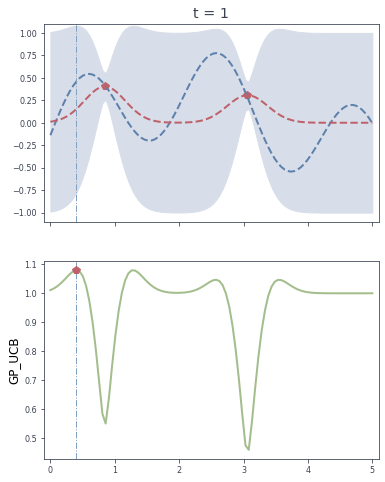

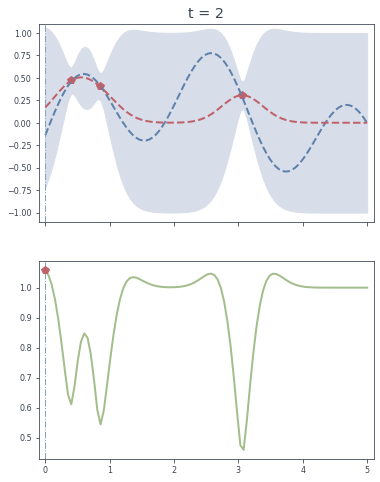

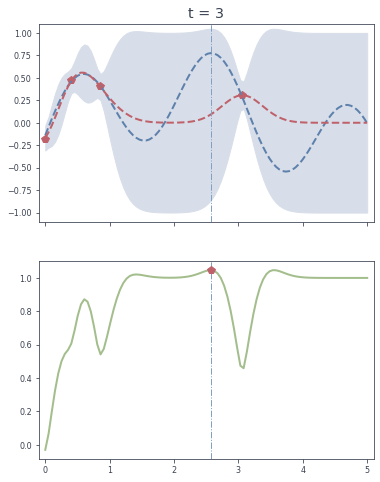

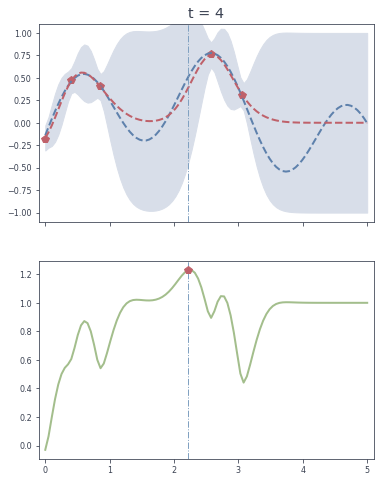

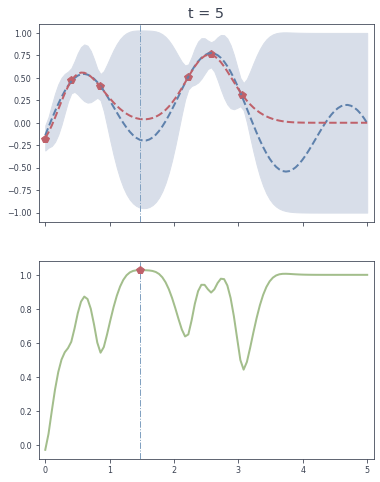

In [15]:
X_gpucb = copy.deepcopy(X)
y_gpucb = copy.deepcopy(y)
Xtest_gpucb = copy.deepcopy(Xtest)

for t in range(it):
    X_gpucb,y_gpucb = update_GP(X_gpucb,y_gpucb,Xtest_gpucb,f,noise,UCB,kernel,xmin-0.1,xmax+0.1,ymin,ymax,it=t+1,eps=0.1,save=False,method='GP_UCB')

**PI**

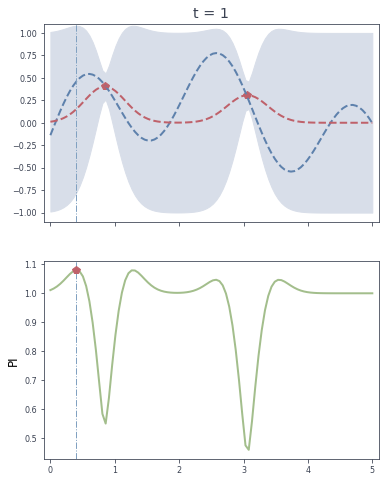

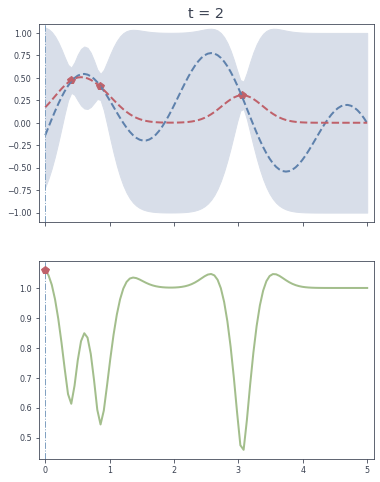

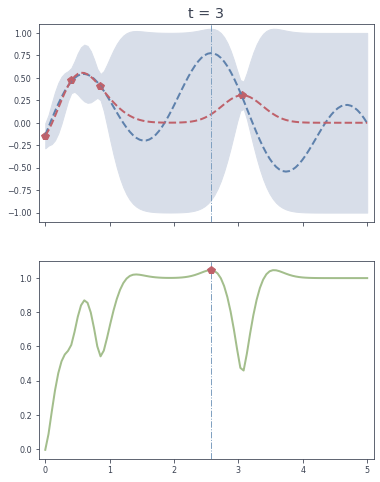

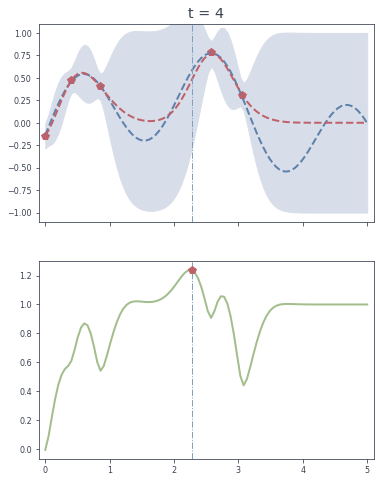

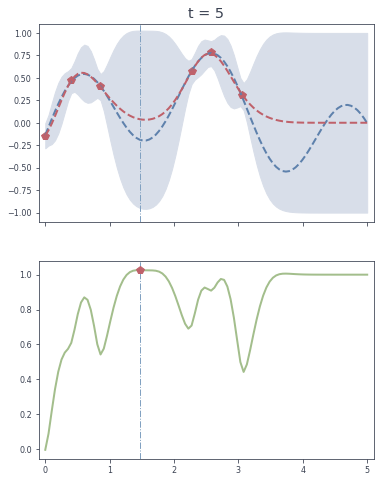

In [16]:
X_pi = copy.deepcopy(X)
y_pi = copy.deepcopy(y)
Xtest_pi = copy.deepcopy(Xtest)

for t in range(it):
    X_pi,y_pi = update_GP(X_pi,y_pi,Xtest_pi,f,noise,UCB,kernel,xmin-0.1,xmax+0.1,ymin,ymax,it=t+1,eps=0.1,save=False,method='PI')

**EI**

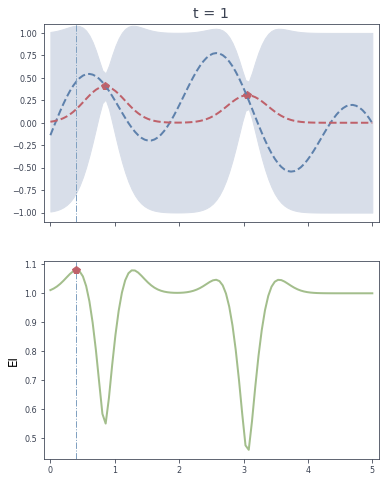

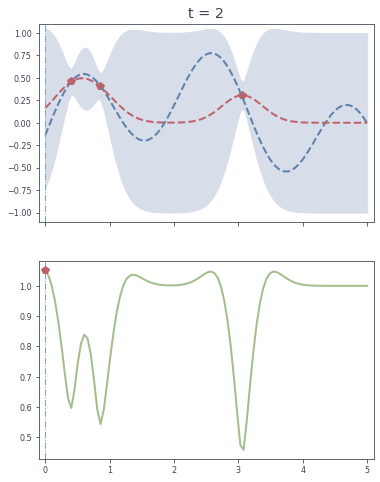

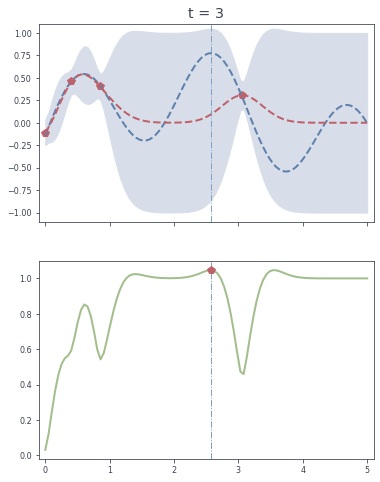

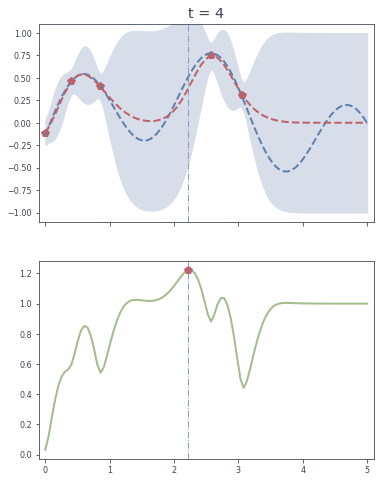

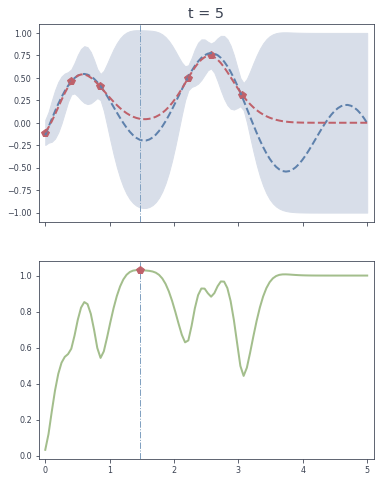

In [17]:
X_ei = copy.deepcopy(X)
y_ei = copy.deepcopy(y)
Xtest_ei = copy.deepcopy(Xtest)

for t in range(it):
    X_ei,y_ei = update_GP(X_ei,y_ei,Xtest_ei,f,noise,UCB,kernel,xmin-0.1,xmax+0.1,ymin,ymax,it=t+1,eps=0.1,save=False,method='EI')

**Thompson Sampling**

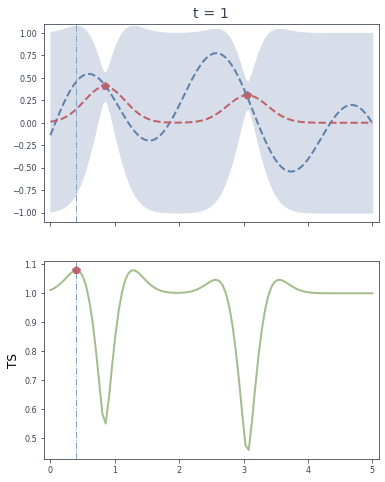

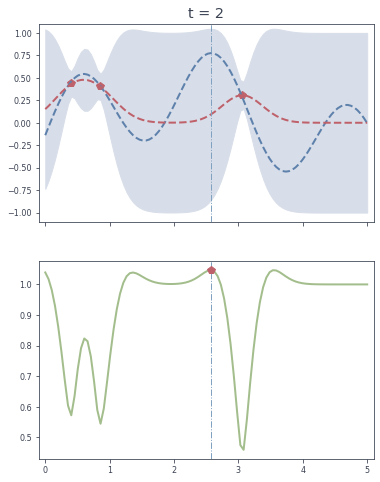

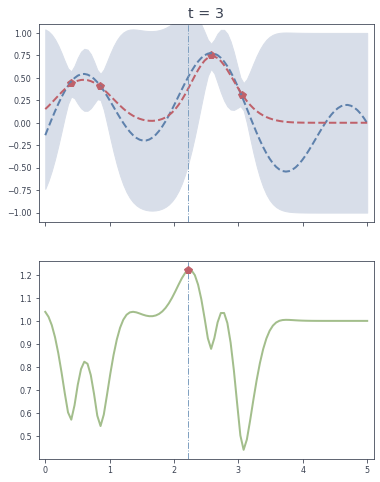

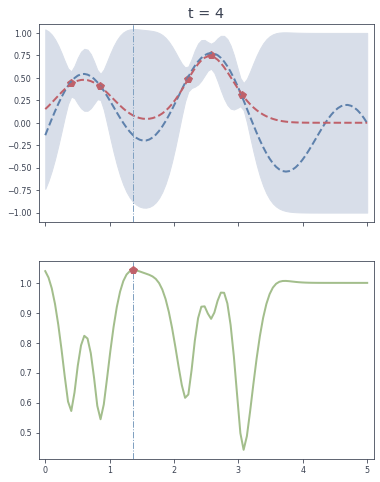

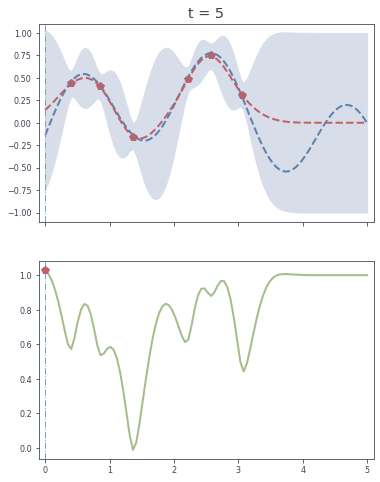

In [18]:
X_ts = copy.deepcopy(X)
y_ts = copy.deepcopy(y)
Xtest_ts = copy.deepcopy(Xtest)

for t in range(it):
    X_ts,y_ts = update_GP(X_ts,y_ts,Xtest_ts,f,noise,UCB,kernel,xmin-0.1,xmax+0.1,ymin,ymax,it=t+1,eps=0.1,save=False,method='TS')